# Area of interest (AOI)

An Area of Interest (AOI), in Geospatial APIs, is a pre-defined labelled spatial definition; usually a jurisdiction (e.g. country, state etc). To find a Geospatial APIs AOI the `ibmpairs.query.search_aois` function can be used.

In [ ]:
%pip install configparser
%pip install ibmpairs
%pip install geopandas
%pip install geoplot

In [1]:
import os
import json
import ibmpairs.query as query
import ibmpairs.client as client
import configparser

import geopandas
import geoplot

config = configparser.RawConfigParser()
config.read('../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id') 

# Authenticate and get a client object.
ei_client = client.get_client(api_key   = EI_API_KEY,
                              tenant_id = EI_TENANT_ID,
                              org_id    = EI_ORG_ID)

2024-08-06 13:59:26 - paw - INFO - The client authentication method is assumed to be OAuth2.
2024-08-06 13:59:26 - paw - INFO - Legacy Environment is False
2024-08-06 13:59:26 - paw - INFO - The authentication api key type is assumed to be IBM Cloud IAM, because the api key prefix 'PHX' is not present.
2024-08-06 13:59:27 - paw - INFO - Authentication success.
2024-08-06 13:59:27 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


In [2]:
aois_list = query.search_aois('middlesex')
aois_list

,id,key,name
0,50313,connecticut.middlesex,Connecticut.Middlesex
1,51219,massachusetts.middlesex,Massachusetts.Middlesex
2,51783,new_jersey.middlesex,New_Jersey.Middlesex
3,52892,virginia.middlesex,Virginia.Middlesex


The AOI id `51219` can be used in a Geospatial APIs query (see Query - [Spatial](../query/spatial.ipynb) for the specification of AOIs, or a full example in the Quick Start [Area of Interest (AOI)](../quickstart/area_of_interest.ipynb).

In order to see more metadata about the AOI `51219` - massachusetts.middlesex, it can be requested with the function `ibmpairs.query.get_aois`.

In [3]:
middlesex_id = int(aois_list.loc[aois_list['key'] == 'massachusetts.middlesex', 'id'].iloc[0])
middlesex = query.get_aoi(middlesex_id)
middlesex

2024-08-06 13:59:29 - paw - INFO - The AOI metadata for 51219 was retreived.


{
    "bbox": [
        42.154225367,
        -71.900942263,
        42.726069367,
        -71.026709263
    ],
    "geojson": "{\"type\":\"Polygon\",\"coordinates\":[[[-71.026709263,42.443307367],[-71.052085263,42.387514367],[-71.073104263,42.389810367],[-71.083702263,42.374139367],[-71.066603263,42.352388367],[-71.116913263,42.352151367],[-71.136224263,42.365762367],[-71.176050263,42.348451367],[-71.152696263,42.327490367],[-71.180811263,42.307650367],[-71.164399263,42.299113367],[-71.189966263,42.280581367],[-71.212916263,42.296076367],[-71.223155263,42.319471367],[-71.238826263,42.331170367],[-71.327231263,42.308022367],[-71.308484263,42.247190367],[-71.332144263,42.244497367],[-71.349737263,42.205774367],[-71.343809263,42.198839367],[-71.393737263,42.188947367],[-71.399681263,42.179071367],[-71.436814263,42.179811367],[-71.476137263,42.154225367],[-71.476900263,42.167416367],[-71.502269263,42.167908367],[-71.554356263,42.183445367],[-71.556989263,42.196674367],[-71.591673263,42.19

The output includes a `bbox` of the outer perimeter of the AOI, a `geojson` specification of the `MultiPolygon` or `Polygon` area, the `name`, `key` and `id`.

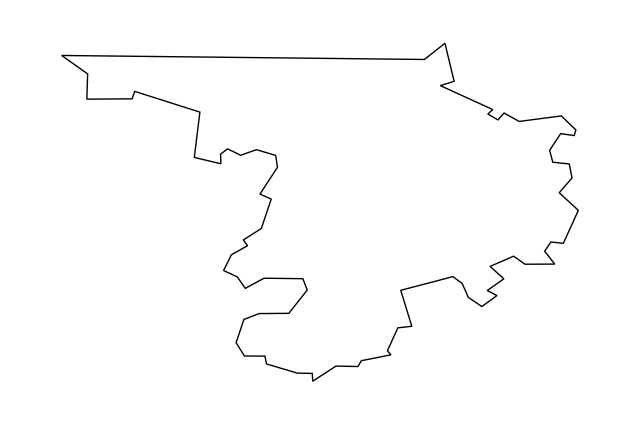

In [4]:
middlesex_geopandas = geopandas.read_file(middlesex.geojson, driver='GeoJSON')
gx = geoplot.polyplot(middlesex_geopandas.geometry)